In [1]:
import pandas as pd
import numpy as np


In [5]:
# DATA LOADING CELL
data_path = "Crimedata.csv"
data = pd.read_csv(data_path) 

C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\250510960.py:3: DtypeWarning: Columns (15,40,41,42,43,44,45,46,52,53,54,71,77,78,79,80,82,83,84,85,101,102,103,104,105,130,131,137,153,154,155,156,157,163,164,165,181,182,183,184,191,207,208,209,213,217,233,234,235,236,237,261,262,263,285,286,287,291,307,308,309,310,311,336,337,338,339,361,362,363,366,367,383,384,385,386,387,419,480,547,555,561,562,563,732,734,736,740,752,754,756,760,800,865,866,867,868,869,870,891,917,965,1006,1007,1085,1086,1087,1148,1167,1218,1219,1243,1245,1246,1248,1251,1252,1257,1260,1269,1285,1326,1328,1338,1340,1350,1352,1354,1368,1397,2084,2085,2086,2091) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [7]:
col_dict = {
'V1263': 'Alcohol_ever',
'V1300' : 'Marijuana_ever',
'V1294' : 'Heroin_ever',
'V1301' : 'Cocaine_ever',
'V1267': 'Alcohol',
'V1266' : "Alcohol_12months",
 'V1327': 'Marijuana',
 'V1315' : 'Marijuana_30days',
 'V1339' : 'Marijuana_12months',
 'V1330': 'Heroin',
 'V1318' : 'Heroin_30days',
 'V1342' : 'Heroin_12months',
 'V1328': 'Cocaine',
 'V1316': 'Cocaine_30days',
 'V1340': 'Cocaine_12months',
 'RV0001': 'Age',
 'RV0003': 'Race',
 'RV0005': 'Sex',
 'V0772': 'State'}

In [8]:
d = data.copy()

In [6]:
data.rename(columns=col_dict,inplace=True)
data

,Unnamed: 0,V0001,V0001B,V0002,V0003,V0004,V0005,V0006,V0007,V0008,...,RV0133,RV0134,RV0135,RV0136,RV0137,RV0138,RV0139,RV0140,RV0141,RV0142
0,1,(999) 999 = Variable Suppressed,1,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes - Full Consent Obtained,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes,...,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed
1,2,(999) 999 = Variable Suppressed,2,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes - Full Consent Obtained,(2) 2 = No,(1) 1 = Yes,(1) 1 = Yes,...,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed
2,3,(999) 999 = Variable Suppressed,3,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes - Full Consent Obtained,(2) 2 = No,(1) 1 = Yes,(1) 1 = Yes,...,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed
3,4,(999) 999 = Variable Suppressed,4,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes - Full Consent Obtained,(2) 2 = No,(1) 1 = Yes,(1) 1 = Yes,...,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed
4,5,(999) 999 = Variable Suppressed,5,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes - Full Consent Obtained,(2) 2 = No,(1) 1 = Yes,(1) 1 = Yes,...,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24843,24844,(999) 999 = Variable Suppressed,24844,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Yes,(1) 1 = Yes - Full Consent Obtained,(2) 2 = No,(1) 1 = Yes,(1) 1 = Yes,...,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed,(999) 999 = Variable Temporarily Suppressed
24844,24845,(999) 999 = Variable Suppressed,24845,(999) 999 = Variable Suppressed,(1) 1 = Yes,(1) 1 = Ye

In [86]:
data.shape

(24848, 2105)

In [9]:
#cols_to_clean = ["Alcohol","Marijuana","Heroin","Cocaine"]
df = data[[
    #"Alcohol", 'Alcohol_ever', 'Alcohol_12months',
    "Marijuana", 'Marijuana_ever', 'Marijuana_12months', 
    "Heroin", 'Heroin_ever', 'Heroin_12months',
    "Cocaine", 'Cocaine_ever', 'Cocaine_12months',
    "Age","Sex","Race"]]
#for col in cols_to_clean:
#    df[col] = df[col].str.extract(r'([\-0-9]+)').fillna(0).astype(int)
df['Sex'] = df['Sex'].str.extract(r'([A-Za-z]+)')
#df['Race'] = df['Race'].str.slice(7)
df.to_csv("./extracted_data_vis4.csv",index=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\1038084325.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].str.extract(r'([A-Za-z]+)')


In [130]:
data.shape
df.

SyntaxError: invalid syntax (Temp/ipykernel_25088/549762084.py, line 2)

In [131]:
with open('test.txt', 'w') as fp:
    for row in data['Marijuana_12months']:
        fp.write(str(row))

In [10]:
df = pd.read_csv('extracted_data_vis4.csv')

In [133]:
#df.dropna()
df.shape

(24848, 12)

In [11]:
total_count = 24848

m_12 = data.Marijuana_12months.value_counts()
m_now = data.Marijuana.value_counts()
m_ever = data.Marijuana_ever.value_counts()

h_12 = data.Heroin_12months.value_counts()
h_now = data.Heroin.value_counts()
h_ever = data.Heroin_ever.value_counts()

c_12 = data.Cocaine_12months.value_counts()
c_now = data.Cocaine.value_counts()
c_ever = data.Cocaine_ever.value_counts()

#a_12 = data.Alcohol_12months.value_counts()
#a_now = data.Alcohol
#a_ever = data.Alcohol_ever.value_counts()

In [135]:
print(c_12, '\n', c_now, '\n', c_ever)

(2) 2 = No              5559
(1) 1 = Yes             2948
(-1) -1 = Don't Know       6
(-2) -2 = Refusal          1
Name: Cocaine_12months, dtype: int64 
 (2) 2 = No              4948
(1) 1 = Yes             2154
(-1) -1 = Don't Know       5
(-2) -2 = Refusal          3
Name: Cocaine, dtype: int64 
 (1) 1 = Yes             12356
(2) 2 = No              12282
(-2) -2 = Refusal          29
(-1) -1 = Don't Know        6
Name: Cocaine_ever, dtype: int64


In [12]:
# now, 12 months ago, earlier than 12 months ago, never, don't know
print(m_ever[1])
marijuana_values = [
    m_now[0],
    len(df[(df['Marijuana'] != '(1) 1 = Yes') & (df['Marijuana_12months']=='(1) 1 = Yes')]),
    len(df[(df['Marijuana'] != '(1) 1 = Yes') & (df['Marijuana_12months']!='(1) 1 = Yes') & (df['Marijuana_ever'] == '(1) 1 = Yes')]),
    m_ever[1],
    total_count - m_ever[0] - m_ever[1]
]

cocaine_values = [
    c_now[1],
    len(df[(df['Cocaine'] != '(1) 1 = Yes') & (df['Cocaine_12months']=='(1) 1 = Yes')]),
    len(df[(df['Cocaine'] != '(1) 1 = Yes') & (df['Cocaine_12months']!='(1) 1 = Yes') & (df['Cocaine_ever'] == '(1) 1 = Yes')]),
    c_ever[1],
    total_count - c_ever[0] - c_ever[1]
]

print('gergegege', h_ever[1], h_now[1] +
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']=='(1) 1 = Yes')])+
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']!='(1) 1 = Yes') & (df['Heroin_ever'] == '(1) 1 = Yes')]),
    )

heroin_values = [
    h_now[1],
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']=='(1) 1 = Yes')]),
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']!='(1) 1 = Yes') & (df['Heroin_ever'] == '(1) 1 = Yes')]),
    h_ever[0],
    total_count - h_ever[0] - h_ever[1]
]

print(sum(marijuana_values), sum(heroin_values), sum(cocaine_values))

print(marijuana_values, heroin_values, cocaine_values)

3994
gergegege 4896 4896
24848 24848 24848
[4889, 4487, 11263, 3994, 215] [1471, 763, 2662, 19740, 212] [2154, 1877, 8325, 12282, 210]


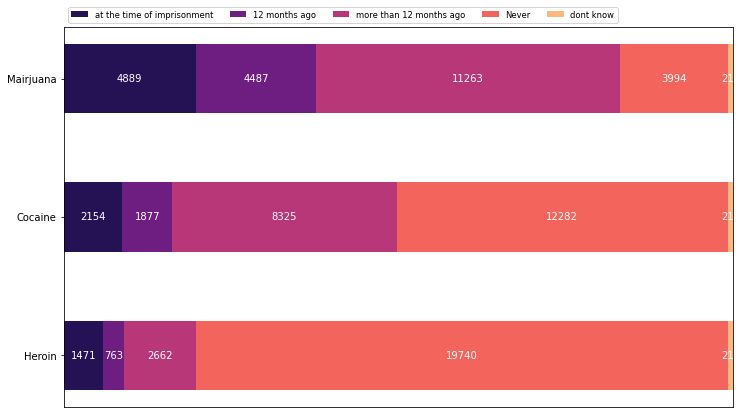

In [13]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['at the time of imprisonment', '12 months ago', 'more than 12 months ago', 'Never', 'dont know']
results = {
    #'Alcohol': [10, 15, 17, 32, 26],
    'Mairjuana': marijuana_values,
    'Cocaine': cocaine_values,
    'Heroin': heroin_values
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('magma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [15]:
df_female = df[df['Sex']=='Female']
len(df_female)

6307

In [16]:
total_count = len(df_female)

marijuana_values = [
    m_now[0],
    len(df[(df['Marijuana'] != '(1) 1 = Yes') & (df['Marijuana_12months']=='(1) 1 = Yes')]),
    len(df[(df['Marijuana'] != '(1) 1 = Yes') & (df['Marijuana_12months']!='(1) 1 = Yes') & (df['Marijuana_ever'] == '(1) 1 = Yes')]),
    m_ever[1],
    total_count - m_ever[0] - m_ever[1]
]

cocaine_values = [
    c_now[1],
    len(df[(df['Cocaine'] != '(1) 1 = Yes') & (df['Cocaine_12months']=='(1) 1 = Yes')]),
    len(df[(df['Cocaine'] != '(1) 1 = Yes') & (df['Cocaine_12months']!='(1) 1 = Yes') & (df['Cocaine_ever'] == '(1) 1 = Yes')]),
    c_ever[1],
    total_count - c_ever[0] - c_ever[1]
]

print('gergegege', h_ever[1], h_now[1] +
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']=='(1) 1 = Yes')])+
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']!='(1) 1 = Yes') & (df['Heroin_ever'] == '(1) 1 = Yes')]),
    )

heroin_values = [
    h_now[1],
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']=='(1) 1 = Yes')]),
    len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']!='(1) 1 = Yes') & (df['Heroin_ever'] == '(1) 1 = Yes')]),
    h_ever[0],
    total_count - h_ever[0] - h_ever[1]
]

print(sum(marijuana_values), sum(heroin_values), sum(cocaine_values))

print(marijuana_values, heroin_values, cocaine_values)

gergegege 4896 4896
6307 6307 6307
[4889, 4487, 11263, 3994, -18326] [1471, 763, 2662, 19740, -18329] [2154, 1877, 8325, 12282, -18331]
